In [13]:
#CALC is a binary indicator of alcohol intake and contains two levels: Yes (positive alcohol intake) and No (zero alcohol intake). 
#TUE is the time spent on technological devices. 
#FAF is the frequency of physical activity. 
#SCC is a binary indicator of food calorie monitoring and comprises two levels: Yes and No. 
#CH2O is the amount of daily water intake in liters. 
#SMOKE is a binary indicator of smoking and contains two levels: Yes (smoke) and No (never smoke). 
#CAEC is the frequency of sub-meals between main meals and involves four levels: No, Sometimes, Frequently and Always. 
#NCP is the number of main meals in a day. 
#FCVC is the frequency of vegetable intake in meals, where FCVC > 2 means positive vegetable intake in every meal and FCVC ≤ 2 means zero vegetable intake for some meals. 
#FAVC is the frequency of consuming high-calorie foods and contains two levels, where Yes and No mean high-frequency and low-frequency intake of high caloric foods respectively. 
#FHWO (family history with overweight) is whether family members have histories of obesity and consists of two levels: Yes and No. Age, gender, height and weight are also recorded.

In [27]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import math  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


Tipos de dados presentes na base:
id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Atributos disponíveis na base de dados:
Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'F

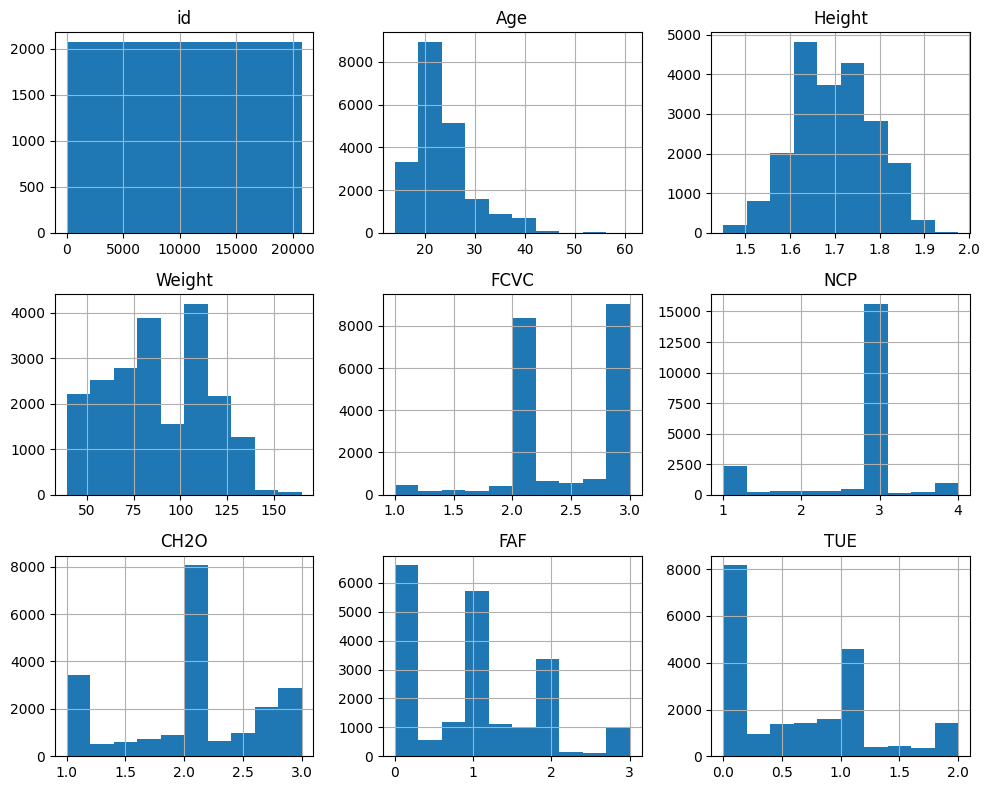

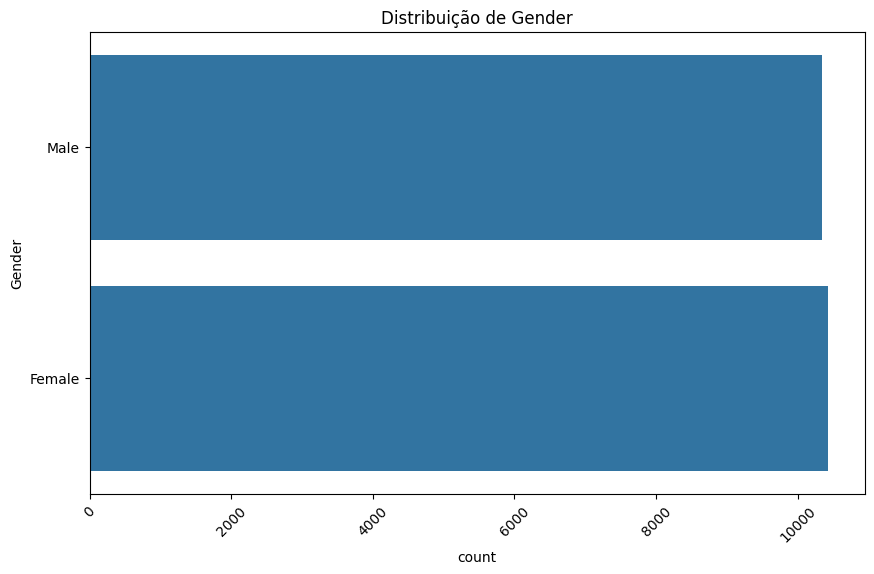

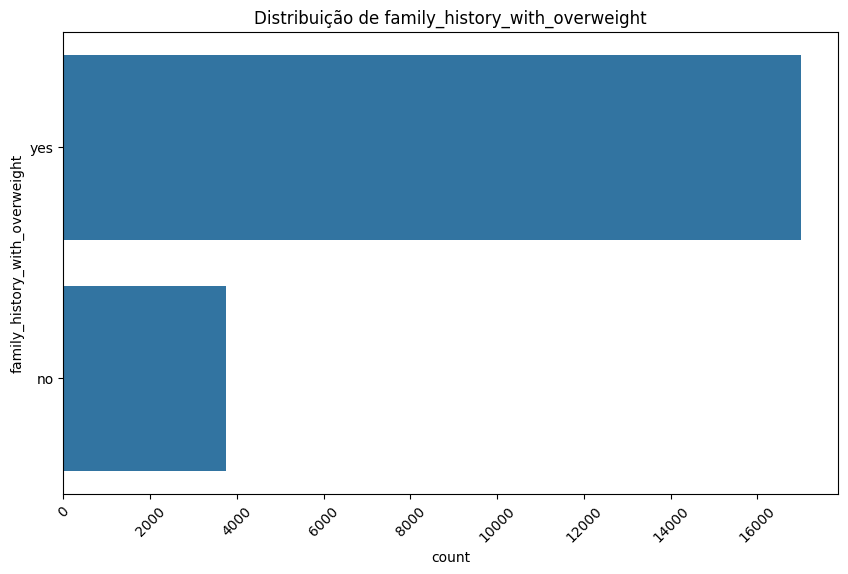

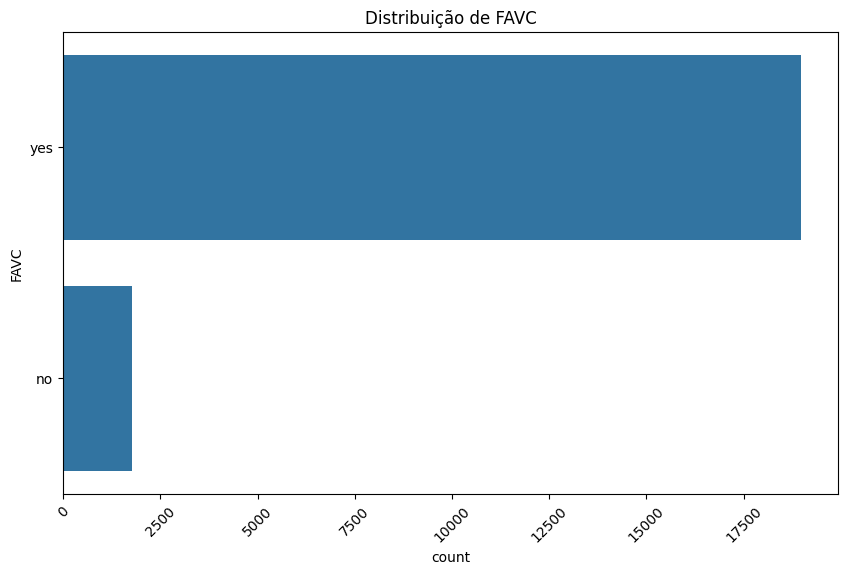

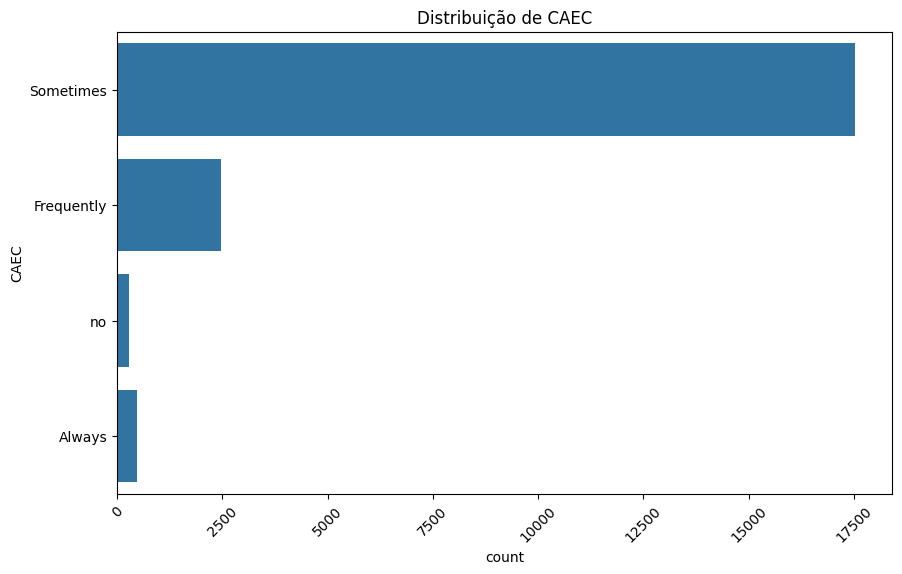

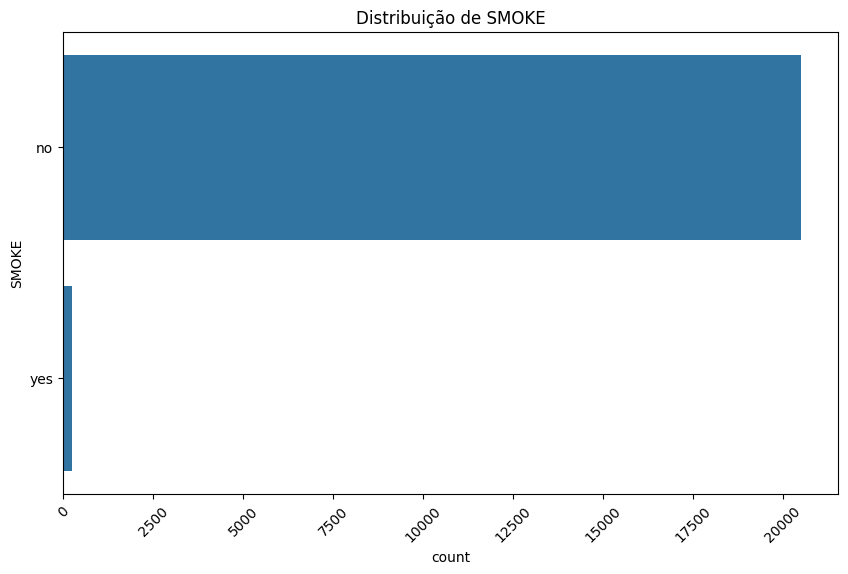

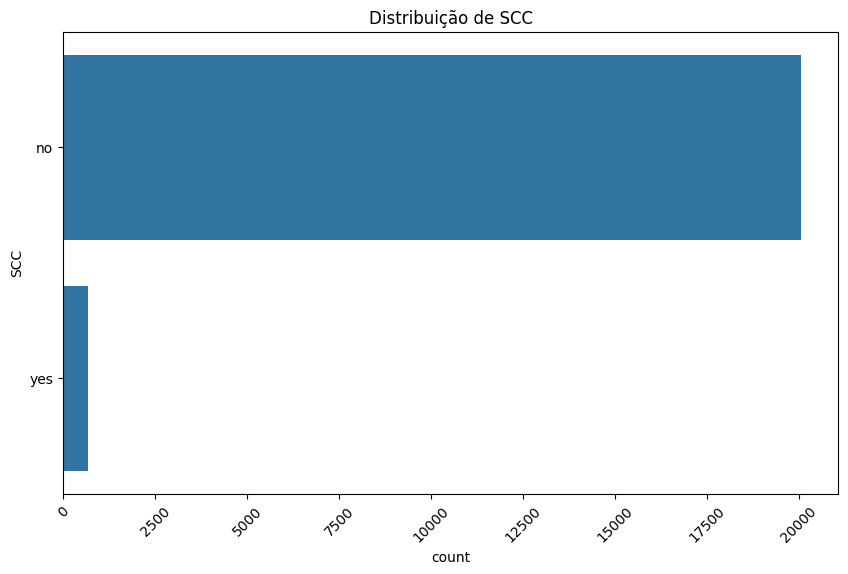

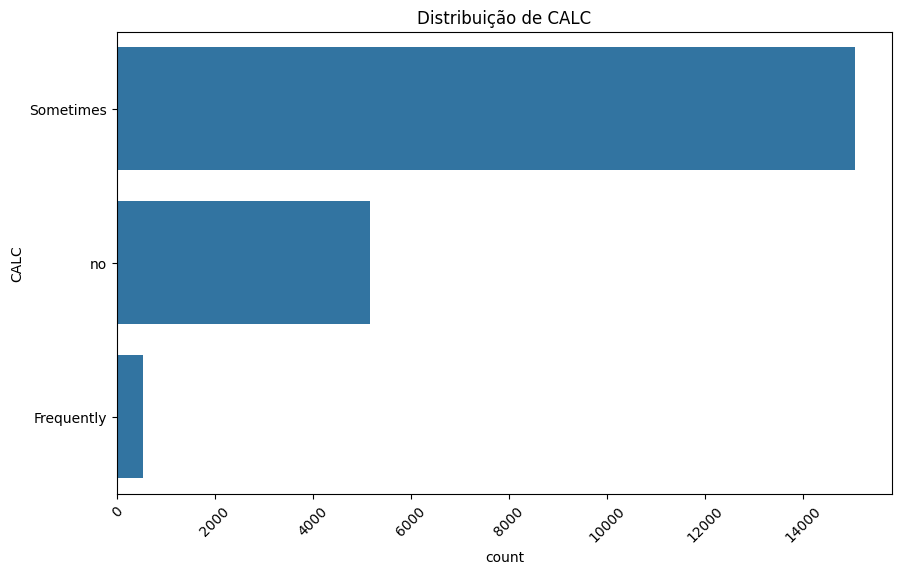

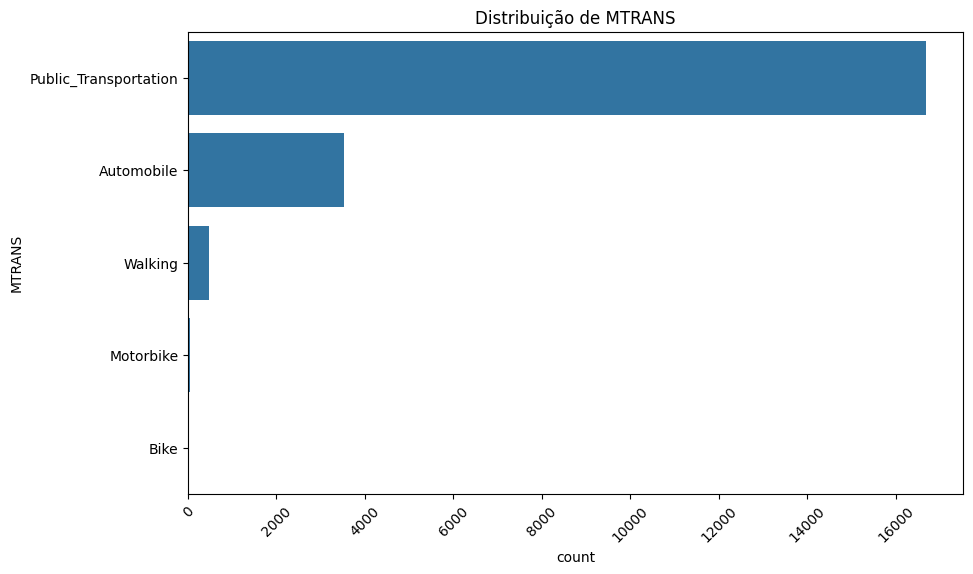

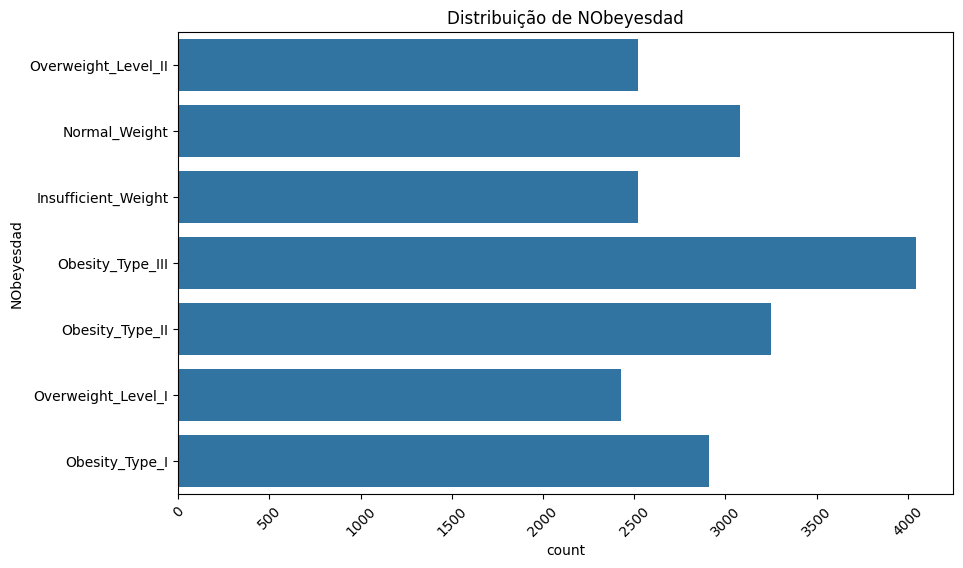

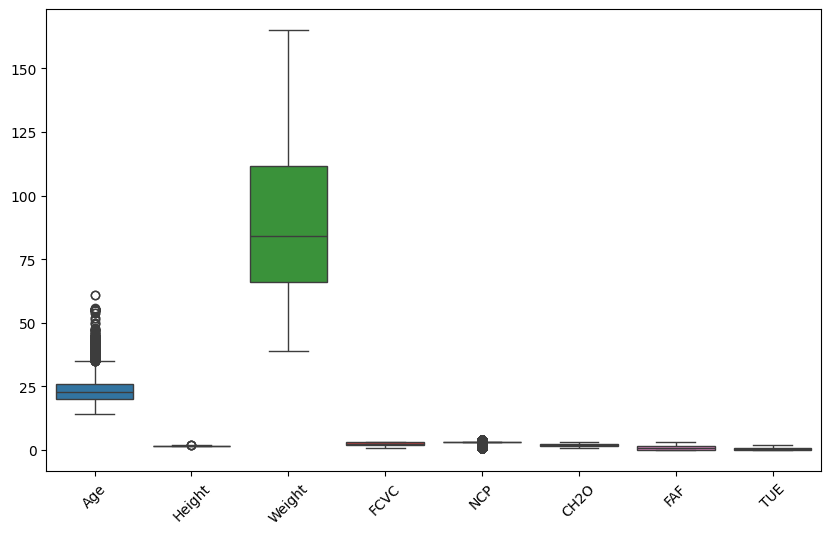

In [11]:


# Carregando os dados
data = pd.read_csv('train.csv')

# Data Objects and Attribute Types
print("Tipos de dados presentes na base:")
print(data.dtypes)

print("\nAtributos disponíveis na base de dados:")
print(data.columns)

# Basic Statistical Descriptions of Data
print("\nMedidas estatísticas básicas:")
print(data.describe())

print("\nNúmero de valores únicos para atributos categóricos:")
# Identificar e criar gráficos de barras para cada atributo categórico
categorical_attributes = data.select_dtypes(include=['object'])
print(data.select_dtypes(include=['object']).nunique())

print("\nValores ausentes por atributo:")
print(data.isnull().sum())

# Data Visualization
# Histograma para atributos numéricos
data.select_dtypes(include=['int', 'float']).hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


# Gráfico de barras para atributos categóricos
for attribute in categorical_attributes.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[attribute])
    plt.title(f'Distribuição de {attribute}')
    plt.xticks(rotation=45)
    plt.show()

# Box plot para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['int', 'float']).drop(columns=['id']))
plt.xticks(rotation=45)
plt.show()


# Matriz de correlação
# plt.figure(figsize=(20, 10))
# sns.heatmap(data_encoded.corr().round(1), annot=True, cmap='coolwarm')
# plt.title('Matriz de Correlação')
# plt.show()

# Calcula a matriz de similaridade Gower
#gower_dist = gower_matrix(data)

# # Exibe a matriz de similaridade Gower
# print("Matriz de Similaridade Gower:")
# print(gower_dist)


In [12]:
encoder = LabelEncoder()
data["Gender"]=encoder.fit_transform(data["Gender"])
data["SMOKE"]=encoder.fit_transform(data["SMOKE"])
data["SCC"]=encoder.fit_transform(data["SCC"])
data["FAVC"]=encoder.fit_transform(data["FAVC"])
data["family_history_with_overweight"]=encoder.fit_transform(data["family_history_with_overweight"])
data["CAEC"]=encoder.fit_transform(data["CAEC"])
data["CALC"]=encoder.fit_transform(data["CALC"])
data["MTRANS"]=encoder.fit_transform(data["MTRANS"])
data["NObeyesdad"]=encoder.fit_transform(data["NObeyesdad"])
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


In [19]:
# Feature 6: Water intake per kg of body weight
data['Water_Intake_Per_Kg'] = data['CH2O'] / data['Weight']

# Feature 1: BMI (Body Mass Index)
data['BMI'] = data['Weight'] / (data['Height'])**2

data['QVPD'] = data['NCP'] * (data['FCVC'])

# Criar feature de interação entre frequência de atividade física e consumo de água
data['Water_Intake_Per_FAF'] =  data['CH2O']/(data['FAF']  +data['Weight'])

# Feature 3: Total physical activity score
data['Total_Activity_Score'] = data['FAF'] - data['TUE']

In [20]:
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,FAF,TUE,CALC,MTRANS,NObeyesdad,Water_Intake_Per_Kg,BMI,QVPD,Water_Intake_Per_FAF,Total_Activity_Score
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,...,0.000000,0.976473,1,3,6,0.033838,28.259565,5.966594,0.033838,-0.976473
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,...,1.000000,1.000000,2,0,1,0.035088,23.422091,6.000000,0.034483,0.000000
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,...,0.866045,1.673584,2,3,0,0.038081,17.126706,2.654722,0.037435,-0.807539
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,...,1.467863,0.780199,1,3,4,0.012752,44.855798,9.000000,0.012611,0.687664
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,...,1.967973,0.931721,1,3,6,0.021108,25.599151,5.282883,0.020674,1.036252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,...,1.330519,0.196680,1,3,3,0.018845,36.587084,8.758752,0.018628,1.133839
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,...,2.000000,1.000000,1,3,0,0.020000,17.099278,12.000000,0.019231,1.000000
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,...,1.158040,1.198439,2,3,3,0.018943,31.889841,7.223451,0.018737,-0.040399
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,...,0.000000,0.973834,2,0,6,0.025680,28.899693,5.266271,0.025680,-0.973834


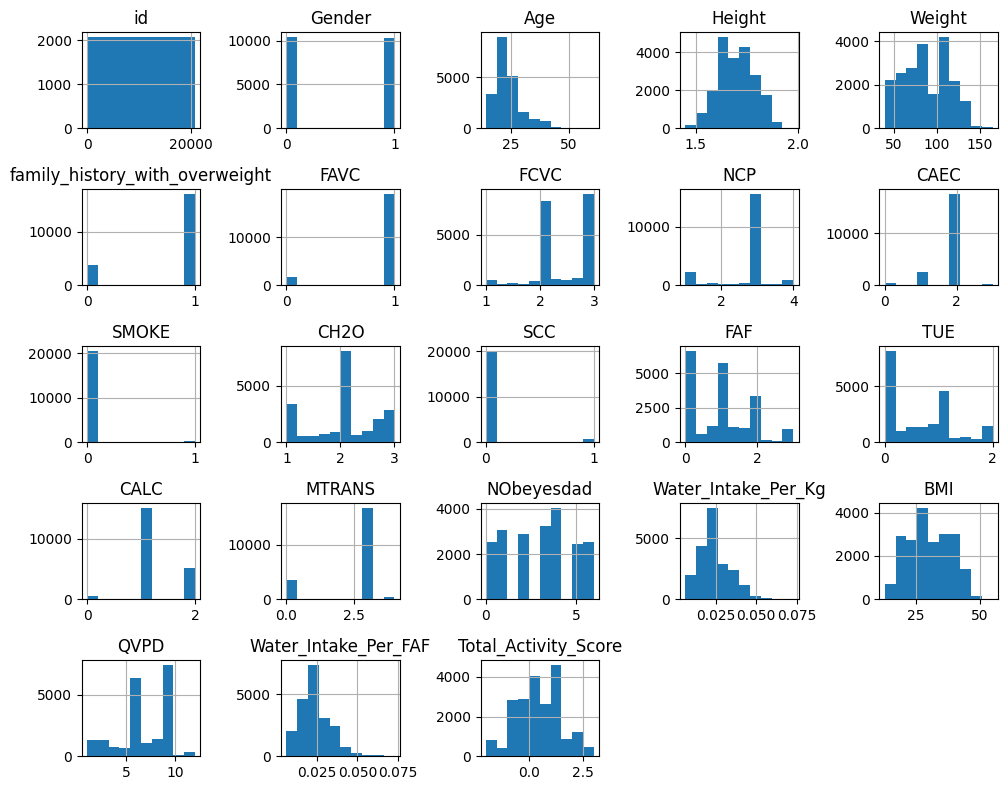

In [21]:
# Data Visualization
# Histograma para atributos numéricos
data.select_dtypes(include=['int', 'float']).hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [22]:
pt = PowerTransformer(method='yeo-johnson')
train_features = data.drop(columns=['id', 'NObeyesdad'], axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = data['NObeyesdad']
train_scaled

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS,Water_Intake_Per_Kg,BMI,QVPD,Water_Intake_Per_FAF,Total_Activity_Score,NObeyesdad
0,1.004152,0.392273,0.001826,-0.180944,0.469099,0.30588,-0.882621,0.182365,0.261059,-0.109287,...,-1.320341,0.775163,-0.421744,0.359015,1.039920,-0.195655,-0.444862,1.088120,-1.323196,6
1,-0.995866,-1.379784,-1.613755,-1.189908,0.469099,0.30588,-0.882621,0.217247,-1.923122,-0.109287,...,0.200903,0.804524,1.560984,-2.041050,1.144514,-0.799525,-0.430818,1.143557,-0.345338,1
2,-0.995866,-1.379784,0.133016,-1.495630,0.469099,0.30588,-1.077494,-1.817734,0.261059,-0.109287,...,0.041157,1.483281,1.560984,0.359015,1.379628,-1.645399,-1.647590,1.384353,-1.152373,0
3,-0.995866,-0.403279,0.124665,1.562234,0.469099,0.30588,1.072753,0.217247,0.261059,-0.109287,...,0.696094,0.509587,-0.421744,0.359015,-1.483546,1.674900,0.964131,-1.490759,0.326303,4
4,1.004152,1.384082,2.427755,0.274031,0.469099,0.30588,0.383134,-1.357225,0.261059,-0.109287,...,1.144539,0.717945,-0.421744,0.359015,-0.286130,-0.523527,-0.724498,-0.313409,0.662487,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1.004152,0.518774,0.762210,0.993953,0.469099,0.30588,0.894011,0.217247,0.261059,-0.109287,...,0.559569,-0.605397,-0.421744,0.359015,-0.580694,0.775512,0.842683,-0.585554,0.756196,3
20754,1.004152,-1.379784,0.116314,-1.503223,-2.131745,0.30588,1.072753,3.013471,-1.923122,-0.109287,...,1.171026,0.804524,-0.421744,0.359015,-0.427744,-1.649268,2.597236,-0.503569,0.627633,0
20755,1.004152,-0.649421,1.362528,0.696208,0.469099,0.30588,-0.155265,0.217247,0.261059,-0.109287,...,0.378172,1.034361,1.560984,0.359015,-0.567469,0.237103,0.106920,-0.570515,-0.385249,3
20756,1.004152,1.587449,0.001848,-0.110046,0.469099,0.30588,0.365801,-1.357225,0.261059,-0.109287,...,-1.320341,0.771840,1.560984,-2.041050,0.250301,-0.118179,-0.731104,0.285725,-1.320523,6


In [23]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [25]:
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
                              criterion='gini', bootstrap=True,
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.960811756473058
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.90      0.88      0.89        82
           2       0.95      0.88      0.91       120
           3       0.98      0.99      0.99       264
           4       1.00      1.00      1.00       791
           5       0.83      0.85      0.84        93
           6       0.65      0.74      0.69        46

    accuracy                           0.96      1429
   macro avg       0.90      0.89      0.89      1429
weighted avg       0.96      0.96      0.96      1429

Confusion Matrix: [[ 29   4   0   0   0   0   0]
 [  1  72   1   0   0   7   1]
 [  0   0 106   4   3   1   6]
 [  0   0   1 262   0   0   1]
 [  0   0   0   0 791   0   0]
 [  0   4   0   0   0  79  10]
 [  0   0   4   0   0   8  34]]


In [29]:
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

C:\Users\Antonny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [01:29:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9629111266620014
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.91      0.84      0.87        82
           2       0.97      0.88      0.93       120
           3       0.98      0.99      0.98       264
           4       0.99      1.00      1.00       791
           5       0.85      0.88      0.87        93
           6       0.70      0.83      0.76        46

    accuracy                           0.96      1429
   macro avg       0.90      0.90      0.90      1429
weighted avg       0.96      0.96      0.96      1429

Confusion Matrix: [[ 28   5   0   0   0   0   0]
 [  3  69   2   0   0   6   2]
 [  0   0 106   6   3   1   4]
 [  0   0   0 262   1   0   1]
 [  0   0   0   0 791   0   0]
 [  0   2   0   0   0  82   9]
 [  0   0   1   0   0   7  38]]
